In [1]:
import numpy as np

In [158]:
# Sigmoid function for predictions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Model
class LogisticRegression:
    def __init__(self, num_features):
        # Initialize weights and bias to zeros
        self.w = np.zeros(num_features)
        self.b = 0
    
    def predict_proba(self, X):
        # Calculate linear combination z = w * X + b
        z = np.dot(X, self.w) + self.b
        # Apply sigmoid to get probability
        return sigmoid(z)
    
    def predict(self, X):
        # Convert probabilities to binary predictions (0 or 1)
        proba = self.predict_proba(X)
        return [1 if p >= 0.5 else 0 for p in proba]
    
    def Loss(self, X,gt,epsilon):
        y_hat = np.clip(self.predict_proba(X),epsilon,1-epsilon)
        # print("I am printing " + str( np.multiply(np.ones(len(gt)) - gt,np.log(np.ones(len(y))-y)) ) )
        return [-np.mean(gt*np.log(y_hat) + (1-gt)*np.log(1-y_hat))]
    
    def updateweights(self, X, gt, y_hat, alpha):
        self.w = self.w - alpha * 1/len(y_hat) * np.dot(X.T,y_hat-gt)
        print(self.w)
        self.b = self.b -  alpha * np.mean(y_hat - gt)

    def evaluate(self,X,gt):
        y_pred = self.predict(X)
        return np.mean(y_pred==gt)*100

        

In [159]:
# Sample dataset with features and binary labels
X_train = np.array([
    [2, 3],
    [1, -1],
    [0, 2],
    [-1, -2],
    [3, 1]
])

y_train = np.array([1, 0, 1, 0, 1])  # Ground truth labels

In [160]:
# Initialize the model for 2 features
model = LogisticRegression(num_features=2)
L = []

for i in range(50):
    y_pred = model.predict_proba(X_train)
    Loss =  model.Loss(X_train,y_train,epsilon = 1e-15)
    L.append(Loss)
    model.updateweights(X_train,y_train,y_pred,1)

model.evaluate(X_train,y_train)


[0.5 0.9]
[0.48910602 1.10535548]
[0.47635791 1.26302294]
[0.46544612 1.39187424]
[0.45692351 1.50116547]
[0.45058675 1.59623542]
[0.4460741  1.68047128]
[0.44303324 1.75616508]
[0.4411641 1.8249429]
[0.44022324 1.88800151]
[0.4400169 1.946248 ]
[0.44039198 2.00038676]
[0.44122765 2.05097605]
[0.44242833 2.09846603]
[0.44391823 2.14322515]
[0.44563695 2.18555894]
[0.44753621 2.22572366]
[0.44957722 2.26393643]
[0.45172871 2.3003829 ]
[0.45396536 2.33522305]
[0.45626661 2.36859579]
[0.45861574 2.40062253]
[0.46099906 2.43141   ]
[0.46340542 2.46105258]
[0.46582563 2.48963411]
[0.46825221 2.51722944]
[0.47067898 2.54390568]
[0.4731009  2.56972324]
[0.47551383 2.59473668]
[0.4779144  2.61899547]
[0.48029986 2.6425446 ]
[0.48266798 2.66542512]
[0.48501697 2.68767457]
[0.48734539 2.70932737]
[0.48965212 2.7304152 ]
[0.49193629 2.75096724]
[0.49419722 2.77101044]
[0.49643445 2.79056976]
[0.49864763 2.80966834]
[0.50083656 2.82832768]
[0.50300112 2.84656782]
[0.50514131 2.86440742]
[0.5072571

np.float64(100.0)

In [161]:
import matplotlib.pyplot as plt

In [162]:
x = np.linspace(1,len(L))

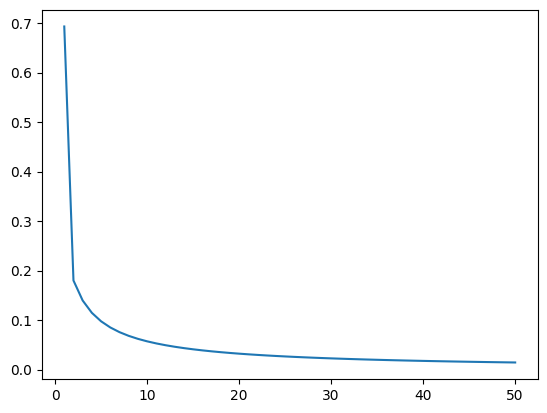

In [163]:
plt.plot(x,L)

In [164]:
X_test = np.array([
    [2, 3],
    [1, -1],
    [0, 2],
    [-1, -2],
    [3, 1],
    [-1, 3],
    [2, -1]
])

y_test = np.array([1, 0, 1, 0, 1, 0, 0])  # Ground truth labels


In [165]:
model.evaluate(X_test,y_test)

np.float64(85.71428571428571)

In [166]:
# Expanded Test Set
X_test_large = np.array([
    [2, 3],
    [1, -1],
    [0, 2],
    [-1, -2],
    [3, 1],
    [-1, 3],
    [2, -1],
    [4, 2],
    [-3, -3],
    [3, -2],
    [2, 2],
    [0, 1],
    [-2, 1],
    [1, 3],
    [-1, -3]
])

y_test_large = np.array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [167]:
model.evaluate(X_test_large,y_test_large)

np.float64(86.66666666666667)

In [185]:
# Sigmoid function for predictions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Model
class LogisticRegression_L2:
    def __init__(self, num_features):
        # Initialize weights and bias to zeros
        self.w = np.zeros(num_features)
        self.b = 0
    
    def predict_proba(self, X):
        # Calculate linear combination z = w * X + b
        z = np.dot(X, self.w) + self.b
        # Apply sigmoid to get probability
        return sigmoid(z)
    
    def predict(self, X):
        # Convert probabilities to binary predictions (0 or 1)
        proba = self.predict_proba(X)
        return [1 if p >= 0.5 else 0 for p in proba]
    
    def Loss(self, X,gt,epsilon,lam):
        y_hat = np.clip(self.predict_proba(X),epsilon,1-epsilon)
        # print("I am printing " + str( np.multiply(np.ones(len(gt)) - gt,np.log(np.ones(len(y))-y)) ) )
        return [-1 * (np.mean(gt*np.log(y_hat) + (1-gt)*np.log(1-y_hat)) + lam/(2*len(y_hat)) * np.dot(self.w,self.w))]
    
    def updateweights(self, X, gt, y_hat, alpha,lam):
        self.w = self.w - alpha * (1/len(y_hat) * np.dot(X.T,y_hat-gt) + lam/len(y_hat)*self.w)
        print(self.w)
        self.b = self.b -  alpha * np.mean(y_hat - gt)

    def evaluate(self,X,gt):
        y_pred = self.predict(X)
        return np.mean(y_pred==gt)*100

In [186]:
# Initialize the model for 2 features
model2 = LogisticRegression_L2(num_features=2)
L = []

In [190]:
for i in range(50):
    y_pred = model2.predict_proba(X_train)
    Loss =  model2.Loss(X_train,y_train,epsilon = 1e-15, lam=1)
    L.append(Loss)
    model2.updateweights(X_train,y_train,y_pred,1,lam=1)

model2.evaluate(X_train,y_train)

[0.39101607 1.72683384]
[0.3452754  1.45393986]
[0.3313475  1.27097351]
[0.33616581 1.15714585]
[0.34693819 1.08977378]
[0.35654698 1.05056839]
[0.36284502 1.02763593]
[0.36603    1.01401967]
[0.36694276 1.00578326]
[0.36638993 1.00069752]
[0.36497243 0.99748444]
[0.36309256 0.99540079]
[0.36100407 0.99400864]
[0.35886041 0.99304697]
[0.35675081 0.99235856]
[0.35472468 0.99184765]
[0.35280724 0.99145524]
[0.35100935 0.99114444]
[0.34933342 0.99089178]
[0.34777713 0.99068199]
[0.34633554 0.9905049 ]
[0.34500241 0.99035349]
[0.34377097 0.99022278]
[0.34263434 0.99010911]
[0.34158578 0.9900097 ]
[0.34061885 0.98992239]
[0.33972744 0.98984541]
[0.33890584 0.98977736]
[0.33814871 0.98971705]
[0.33745108 0.98966348]
[0.33680836 0.9896158 ]
[0.33621627 0.98957328]
[0.33567088 0.98953531]
[0.33516854 0.98950134]
[0.33470588 0.9894709 ]
[0.33427979 0.98944358]
[0.3338874  0.98941904]
[0.33352606 0.98939695]
[0.33319334 0.98937705]
[0.33288696 0.98935909]
[0.33260487 0.98934287]
[0.33234514 0.98

np.float64(100.0)

In [191]:
X_test_large = np.array([
    [2, 3],
    [1, -1],
    [0, 2],
    [-1, -2],
    [3, 1],
    [-1, 3],
    [2, -1],
    [4, 2],
    [-3, -3],
    [3, -2],
    [2, 2],
    [0, 1],
    [-2, 1],
    [1, 3],
    [-1, -3]
])

y_test_large = np.array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [192]:
model2.evaluate(X_test_large,y_test_large)

np.float64(86.66666666666667)